In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read in the data
df = pd.read_csv(r'D:\DataAnalyst\Python_Project\movies.csv')

In [2]:
df

name     rating      genre  year  \
0      The Pursuit of Happyness      PG-13  Biography  2006   
1          Little Miss Sunshine          R     Comedy  2006   
2     The Last King of Scotland          R  Biography  2006   
3                 Blood Diamond          R  Adventure  2006   
4           The Lives of Others          R      Drama  2006   
...                         ...        ...        ...   ...   
5416          Bad Boys for Life          R     Action  2020   
5417         Sonic the Hedgehog         PG     Action  2020   
5418                   Dolittle         PG  Adventure  2020   
5419       The Call of the Wild         PG  Adventure  2020   
5420          The Eight Hundred  Not Rated     Action  2020   

                               released  score   votes  \
0     December 15, 2006 (United States)    8.0  465000   
1       August 18, 2006 (United States)    7.8  450000   
2      January 19, 2007 (United States)    7.7  179000   
3      December 8, 2006 (United States)    8.0  511000   
4        March 30, 2007 (United States)    8.4  368000   
...                                 ...    ...     ...   
5416   January 17, 2020 (United States)    6.6  140000   
5417  February 14, 2020 (United States)    6.5  102000   
5418   January 17, 2020 (United States)    5.6   53000   
5419  February 21, 2020 (United States)    6.8   42000   
5420    August 28, 2020 (United States)    6.8    3700   

                              director                            writer  \
0                     Gabriele Muccino                      Steve Conrad   
1                      Jonathan Dayton                     Michael Arndt   
2                      Kevin Macdonald                      Peter Morgan   
3                         Edward Zwick                   Charles Leavitt   
4     Florian Henckel von Donnersmarck  Florian Henckel von Donnersmarck   
...                                ...                               ...   
5416                      Adil El Arbi                       Peter Craig   
5417                       Jeff Fowler                         Pat Casey   
5418                    Stephen Gaghan                    Stephen Gaghan   
5419                     Chris Sanders                     Michael Green   
5420                           Hu Guan                           Hu Guan   

                   star         country     budget      gross  \
0            Will Smith   United States   55000000  307127625   
1          Steve Carell   United States    8000000  101058954   
2          James McAvoy  United Kingdom    6000000   48618191   
3     Leonardo DiCaprio   United States  100000000  171720398   
4           Ulrich Mühe         Germany    2000000   77356942   
...                 ...             ...        ...        ...   
5416         Will Smith   United States   90000000  426505244   
5417       Ben Schwartz   United States   85000000  319715683   
5418  Robert Downey Jr.   United States  175000000  245487753   
5419      Harrison Ford          Canada  135000000  111105497   
5420    Zhi-zhong Huang           China   80000000  461421559   

                                  company  runtime  
0                       Columbia Pictures      117  
1                Fox Searchlight Pictures      101  
2                Fox Searchlight Pictures      123  
3                            Warner Bros.      143  
4         Wiedemann & Berg Filmproduktion      137  
...                                   ...      ...  
5416                    Columbia Pictures      124  
5417                   Paramount Pictures       99  
5418                   Universal Pictures      101  
5419                 20th Century Studios      100  
5420  Beijing Diqi Yinxiang Entertainment      149  

[5421 rows x 15 columns]

In [3]:
# Let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [4]:
# Data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [5]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

name     rating   genre  year  \
3731                                      Avatar      PG-13  Action  2009   
5302                           Avengers: Endgame      PG-13  Action  2019   
1538                                     Titanic      PG-13   Drama  1997   
4730  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
5158                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
3898                                 Tanner Hall          R   Drama  2009   
2044                  Philadelphia Experiment II      PG-13  Action  1993   
790                                 Ginger Snaps  Not Rated   Drama  2000   
313                                     Parasite          R  Horror  1982   
1663                                  Trojan War      PG-13  Comedy  1997   

                               released  score    votes             director  \
3731  December 18, 2009 (United States)    7.8  1100000        James Cameron   
5302     April 26, 2019 (United States)    8.4   903000        Anthony Russo   
1538  December 19, 1997 (United States)    7.8  1100000        James Cameron   
4730  December 18, 2015 (United States)    7.8   876000          J.J. Abrams   
5158     April 27, 2018 (United States)    8.4   897000        Anthony Russo   
...                                 ...    ...      ...                  ...   
3898          January 15, 2015 (Sweden)    5.8     3500  Francesca Gregorini   
2044         June 4, 1994 (South Korea)    4.5     1900     Stephen Cornwell   
790               May 11, 2001 (Canada)    6.8    43000         John Fawcett   
313      March 12, 1982 (United States)    3.9     2300         Charles Band   
1663           October 1, 1997 (Brazil)    5.7     5800         George Huang   

                       writer               star        country     budget  \
3731            James Cameron    Sam Worthington  United States  237000000   
5302       Christopher Markus  Robert Downey Jr.  United States  356000000   
1538            James Cameron  Leonardo DiCaprio  United States  200000000   
4730          Lawrence Kasdan       Daisy Ridley  United States  245000000   
5158       Christopher Markus  Robert Downey Jr.  United States  321000000   
...                       ...                ...            ...        ...   
3898  Tatiana von Fürstenberg        Rooney Mara  United States    3000000   
2044       Wallace C. Bennett       Brad Johnson  United States    5000000   
790              Karen Walton      Emily Perkins         Canada    5000000   
313             Alan J. Adler    Robert Glaudini  United States     800000   
1663                Andy Burg       Will Friedle  United States   15000000   

           gross                    company  runtime  
3731  2847246203      Twentieth Century Fox      162  
5302  2797501328             Marvel Studios      181  
1538  2201647264      Twentieth Century Fox      194  
4730  2069521700                  Lucasfilm      138  
5158  2048359754             Marvel Studios      149  
...          ...                        ...      ...  
3898        5073           Two Prong Lesson       96  
2044        2970           Trimark Pictures       97  
790         2554  Copperheart Entertainment      108  
313         2270           Embassy Pictures       85  
1663         309                   Daybreak       85  

[5421 rows x 15 columns]

In [7]:
# Drop any duplicates

df.drop_duplicates()

name     rating      genre  \
0                              The Pursuit of Happyness      PG-13  Biography   
1                                  Little Miss Sunshine          R     Comedy   
2                             The Last King of Scotland          R  Biography   
3                                         Blood Diamond          R  Adventure   
4                                   The Lives of Others          R      Drama   
5                                   Night at the Museum         PG  Adventure   
6                               Mission: Impossible III      PG-13     Action   
7                                      Marie Antoinette      PG-13  Biography   
8                                            Inside Man          R      Crime   
9                                        Running Scared          R     Action   
10                                             Accepted      PG-13     Comedy   
11                                     Superman Returns      PG-13     Action   
12                                              Slither          R     Comedy   
13                                          Nacho Libre         PG     Comedy   
14                                         The Covenant      PG-13     Action   
15                                  The Hills Have Eyes          R     Horror   
16                                         The Fountain      PG-13      Drama   
17                                X-Men: the Last Stand      PG-13     Action   
18                                Underworld: Evolution          R     Action   
19                                                Click      PG-13     Comedy   
20                                          The Holiday      PG-13     Comedy   
21                                          Silent Hill          R     Horror   
22                                     Basic Instinct 2          R      Drama   
23                                     The Black Dahlia          R      Crime   
24                     Perfume: The Story of a Murderer          R      Crime   
25                                  Lucky Number Slevin          R      Crime   
26                                         Smokin' Aces          R     Action   
27                                              Deja Vu      PG-13     Action   
28                                                   RV         PG  Adventure   
29                   Tenacious D in the Pick of Destiny          R  Adventure   
30                                           Black Book          R      Drama   
31                                              Step Up      PG-13      Crime   
32    Borat: Cultural Learnings of America for Make ...          R     Comedy   
33                                    Snakes on a Plane          R     Action   
34                                    Lady in the Water      PG-13      Drama   
35                                                Crank          R     Action   
36                                      The Illusionist      PG-13      Drama   
37                                       Over the Hedge         PG  Animation   
38                                  Final Destination 3          R     Horror   
39                                Stranger Than Fiction      PG-13     Comedy   
40                                           Aquamarine         PG     Comedy   
41                                        Scary Movie 4      PG-13     Comedy   
42                                             The Fall          R  Adventure   
43                                 John Tucker Must Die      PG-13     Comedy   
44                                    The Good Shepherd          R      Drama   
45                                         Rocky Balboa         PG     Action   
46                                               Eragon         PG     Action   
47                                           Dreamgirls      PG-13      Drama   
48                                                Babel          R      Drama   
4

In [8]:
# budget high correlation
# company high correlation

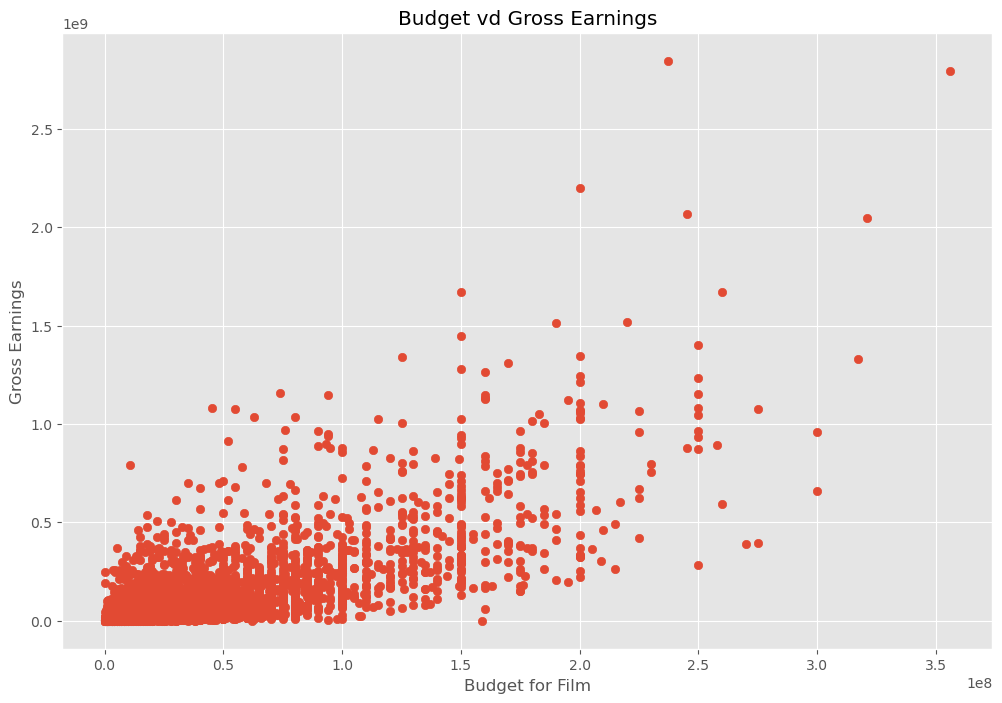

In [9]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vd Gross Earnings')

plt.xlabel('Budget for Film')

plt.ylabel('Gross Earnings')

plt.show()

In [10]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

df.head()

name rating   genre  year  \
3731                                      Avatar  PG-13  Action  2009   
5302                           Avengers: Endgame  PG-13  Action  2019   
1538                                     Titanic  PG-13   Drama  1997   
4730  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
5158                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
3731  December 18, 2009 (United States)    7.8  1100000  James Cameron   
5302     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
1538  December 19, 1997 (United States)    7.8  1100000  James Cameron   
4730  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
5158     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
3731       James Cameron    Sam Worthington  United States  237000000   
5302  Christopher Markus  Robert Downey Jr.  United States  356000000   
1538       James Cameron  Leonardo DiCaprio  United States  200000000   
4730     Lawrence Kasdan       Daisy Ridley  United States  245000000   
5158  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  
3731  2847246203  Twentieth Century Fox      162  
5302  2797501328         Marvel Studios      181  
1538  2201647264  Twentieth Century Fox      194  
4730  2069521700              Lucasfilm      138  
5158  2048359754         Marvel Studios      149

<Axes: xlabel='budget', ylabel='gross'>

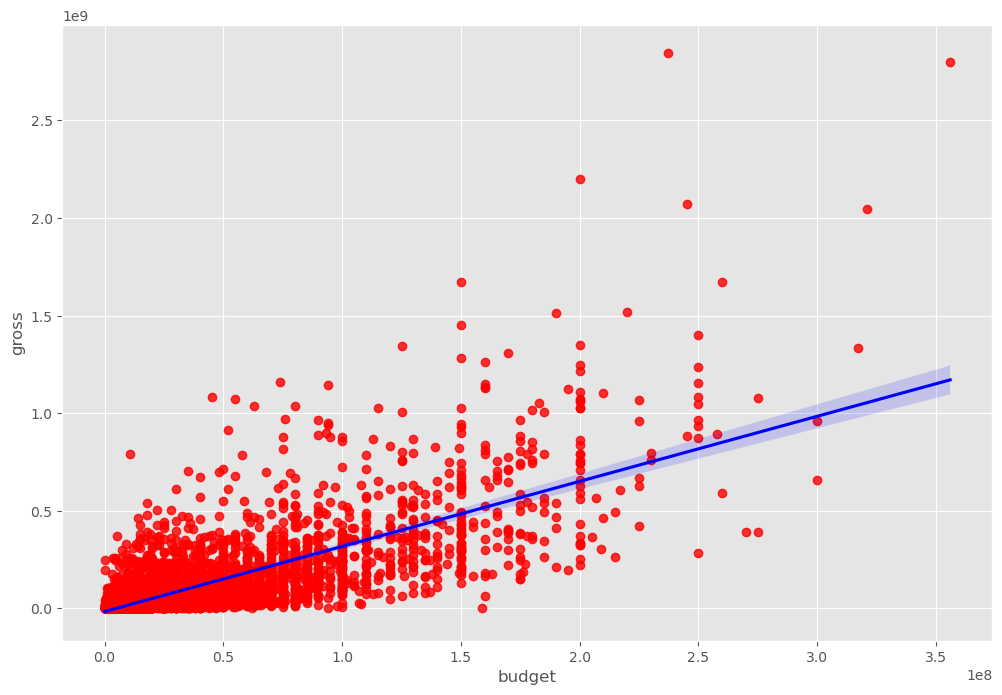

In [11]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [12]:
# Looking at correlation

numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr(method='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

In [13]:
# High correlation between budget and gross is right

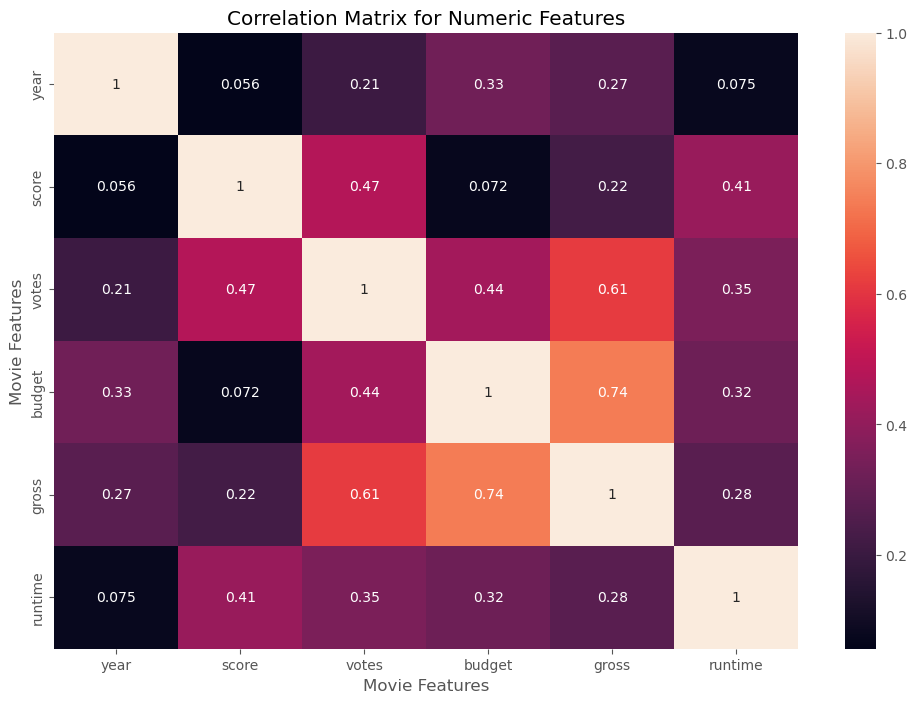

In [14]:
correlation_matrix = numeric_df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [15]:
# Looking at Company

df.head()

name rating   genre  year  \
3731                                      Avatar  PG-13  Action  2009   
5302                           Avengers: Endgame  PG-13  Action  2019   
1538                                     Titanic  PG-13   Drama  1997   
4730  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
5158                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
3731  December 18, 2009 (United States)    7.8  1100000  James Cameron   
5302     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
1538  December 19, 1997 (United States)    7.8  1100000  James Cameron   
4730  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
5158     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
3731       James Cameron    Sam Worthington  United States  237000000   
5302  Christopher Markus  Robert Downey Jr.  United States  356000000   
1538       James Cameron  Leonardo DiCaprio  United States  200000000   
4730     Lawrence Kasdan       Daisy Ridley  United States  245000000   
5158  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  
3731  2847246203  Twentieth Century Fox      162  
5302  2797501328         Marvel Studios      181  
1538  2201647264  Twentieth Century Fox      194  
4730  2069521700              Lucasfilm      138  
5158  2048359754         Marvel Studios      149

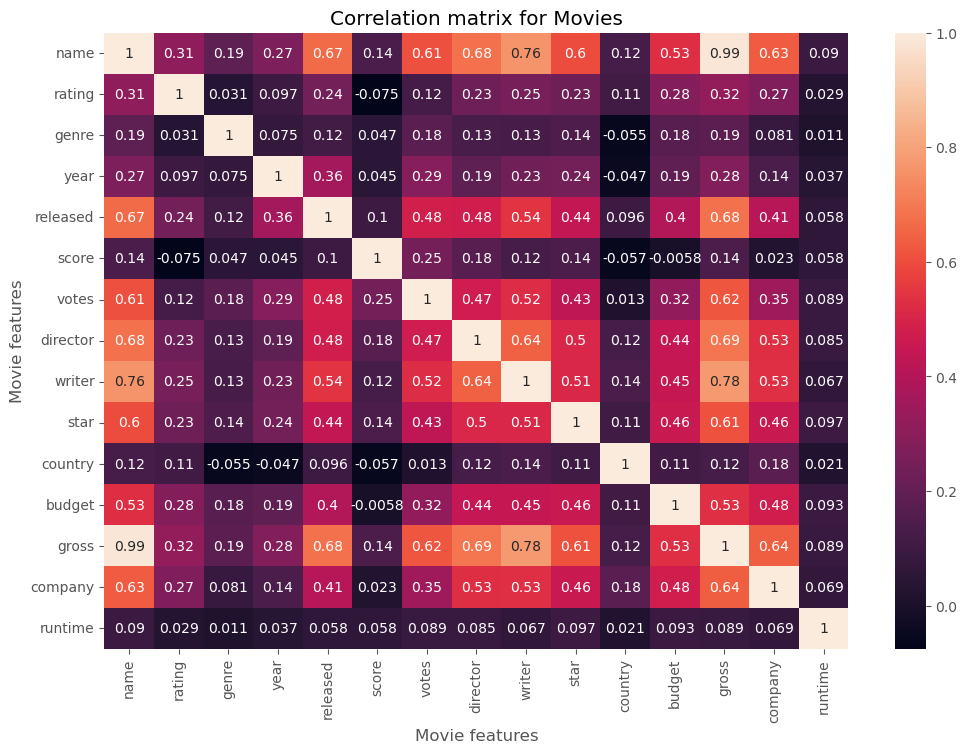

In [16]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [17]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name      name        1.000000
          rating      0.314800
          genre       0.186668
          year        0.267282
          released    0.667784
          score       0.136453
          votes       0.608411
          director    0.679808
          writer      0.764057
          star        0.599410
          country     0.124405
          budget      0.526690
          gross       0.986431
          company     0.631721
          runtime     0.089567
rating    name        0.314800
          rating      1.000000
          genre       0.031419
          year        0.096638
          released    0.241252
          score      -0.075109
          votes       0.121122
          director    0.230190
          writer      0.251470
          star        0.226006
          country     0.111309
          budget      0.283770
          gross       0.319778
          company     0.269792
          runtime     0.029208
genre     name        0.186668
          rating      0.031419
        

In [18]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

rating    score      -0.075109
score     rating     -0.075109
          country    -0.057087
country   score      -0.057087
          genre      -0.055109
genre     country    -0.055109
country   year       -0.047325
year      country    -0.047325
score     budget     -0.005767
budget    score      -0.005767
genre     runtime     0.011329
runtime   genre       0.011329
country   votes       0.013363
votes     country     0.013363
country   runtime     0.020546
runtime   country     0.020546
company   score       0.022732
score     company     0.022732
rating    runtime     0.029208
runtime   rating      0.029208
rating    genre       0.031419
genre     rating      0.031419
year      runtime     0.037011
runtime   year        0.037011
score     year        0.045163
year      score       0.045163
score     genre       0.047421
genre     score       0.047421
score     runtime     0.057866
runtime   score       0.057866
          released    0.058183
released  runtime     0.058183
runtime 

In [19]:
# Take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

director  star        0.504992
star      director    0.504992
writer    star        0.510628
star      writer      0.510628
votes     writer      0.522918
writer    votes       0.522918
budget    name        0.526690
name      budget      0.526690
director  company     0.528071
company   director    0.528071
writer    company     0.532013
company   writer      0.532013
budget    gross       0.532810
gross     budget      0.532810
released  writer      0.541156
writer    released    0.541156
star      name        0.599410
name      star        0.599410
votes     name        0.608411
name      votes       0.608411
gross     star        0.612142
star      gross       0.612142
gross     votes       0.620450
votes     gross       0.620450
company   name        0.631721
name      company     0.631721
gross     company     0.637241
company   gross       0.637241
director  writer      0.642875
writer    director    0.642875
released  name        0.667784
name      released    0.667784
released

In [20]:
# Director and star have the highest correlation to gross earnings

# Company has low correlation